# Final Notebook overview of the CTW Project 
This is the final cumulative notebook to gather together Mackenzie and Philip's different explorations of the WHO's life expectancy data set and how we interpreted and visualized it in a way we think would change the world. We first started by combining the separate csv's of each WHO Region and cleaning the columns to contain integers we could plot on continuous graphs. We also rounded age groups down to lowest age of the group and decided to use single integers instead of the full range. Finally, we dropped useless categories that were only included for book keeping purposes for the WHO.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dfAfrica = pd.read_csv("datasets/africa.csv")
dfAmericas = pd.read_csv("datasets/americas.csv")
dfEMed = pd.read_csv("datasets/mediterranean.csv")
dfEurope = pd.read_csv("datasets/europe.csv")
dfSEAsia = pd.read_csv("datasets/asia.csv")
dfWPacific = pd.read_csv("datasets/pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

/Users/philip/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)

It's importanting to remember the meanings of the values in the GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [3]:
cleanData(result)

After cleaning the data, we looked at categories 31 and 32. They were both in the same unit (people) and the metrics should have complemented one another, indicating if the data was misleading or faulty. Logically, the more people there are dying in an age group, the fewer there are left alive.

We isolated the GHO 31 and 32 columns with both sexes (for a more general data on a given region) and arranged both dataframes by ascending age groups for better plotting. 

In [4]:
#isolate the both sexes group for a mean for an entire age group
bothSex = result[result.SEX == 2]
#ioslate and sort for cat 31, the number of people left alive
GHO31 = bothSex[bothSex.GHO == 31]
GHO31.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)
#isolate and sort for cat 32, number of poeple dying 
GHO32 = bothSex[bothSex.GHO == 32]
GHO32.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)


/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/Users/philip/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self.sort_values(by, axis=axis, ascending=ascending, inplace=inplace)
/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [5]:
def aliveDie(region, name):
    """Takes in a string to select region for the alive/dying graph"""
    regionGHO31 = GHO31[GHO31.REGION == region]
    regionGHO32 = GHO32[GHO32.REGION == region]
    
    N = 88
    ind = np.arange(N)
    width = .50

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, regionGHO31.Numeric.values, width, color = 'r')
    rects2 = ax.bar(ind + width, regionGHO32.Numeric.values, width, color = 'b')
    ax.set_ylabel("Population")
    ax.set_xlabel("Age")
    ax.set_xticks(ind+width)
    spacer =["","",""]
    labels = ax.set_xticklabels(["0.5","","","", "1","","","", "5","","","", "10","","","", "15","","","", "20","","","", 
                                 "25","","","", "30","","","", "35","","","", "40","","","",
                                 "45","","","", "50","","","", "55","","","", "60","","","", 
                                 "65","","","", "70","","","", "75","","","", "80","","","", "85","","","", "90","","","", 
                                 "95","","","", "100"])
    ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
    fig.set_size_inches(12.5, 7.5)
    plt.setp(labels, rotation = 90)
    ax.set_title("Values for Number of People Alive Compared to Number of People Dying in "+ name)

    plt.show()

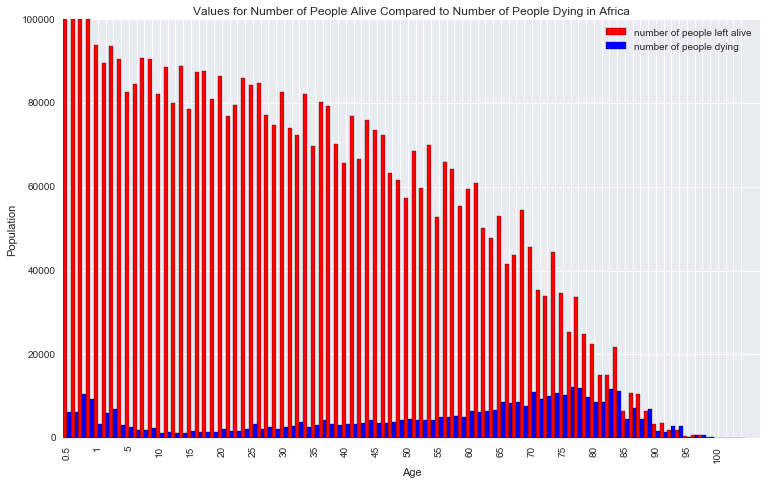

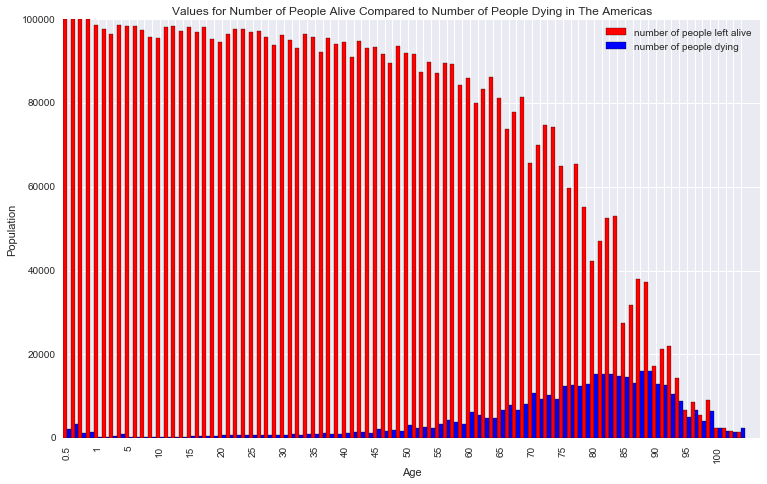

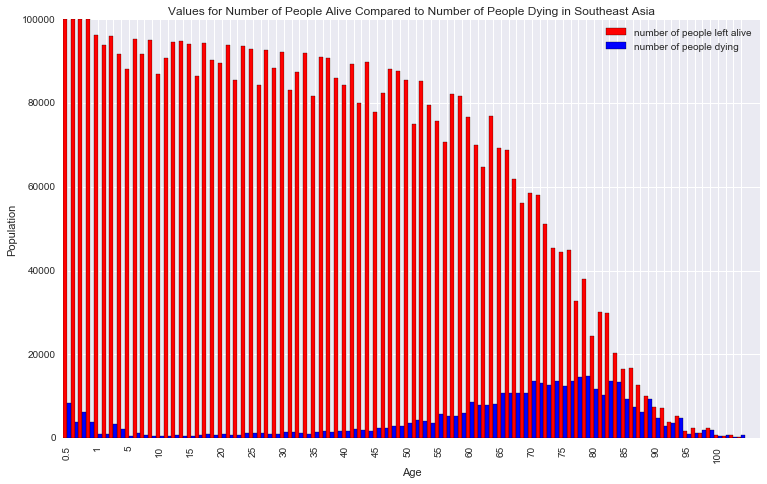

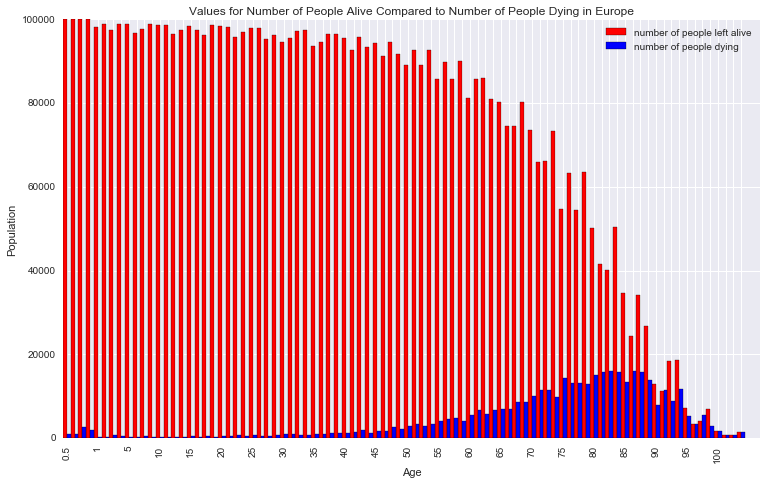

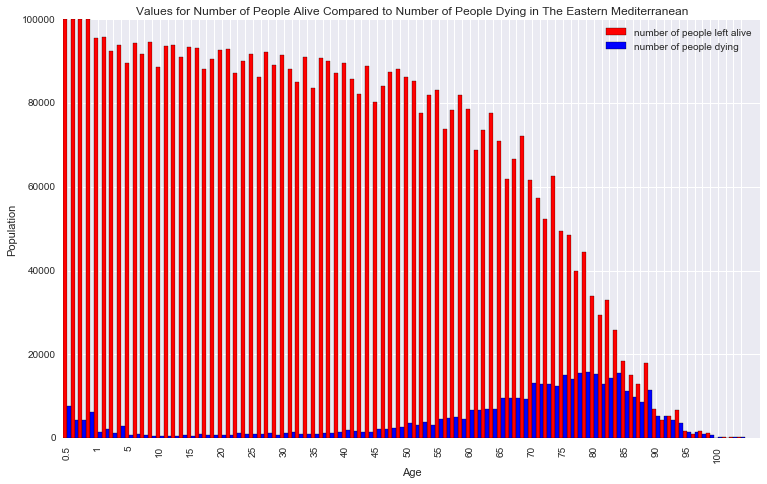

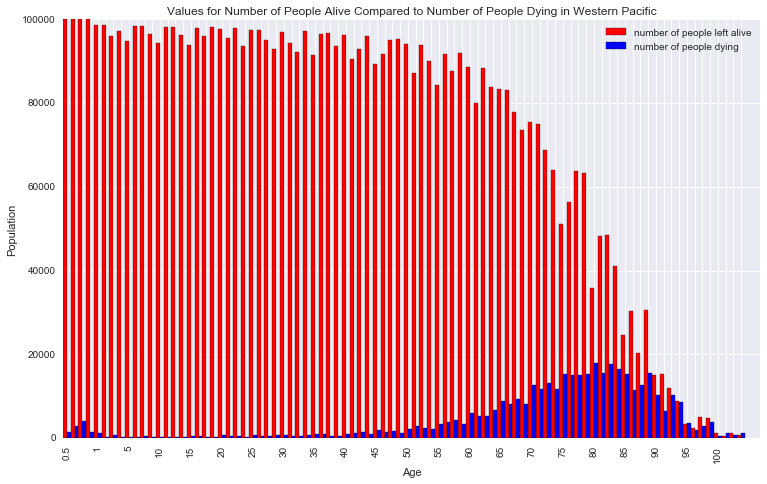

In [6]:
aliveDie('AFR', 'Africa')
aliveDie('AMR', 'The Americas')
aliveDie('SEAR','Southeast Asia')
aliveDie('EUR', 'Europe')
aliveDie('EMR', 'The Eastern Mediterranean')
aliveDie('WPR', 'Western Pacific')

These trends seemed reasonable, especially given that they described higher mortality for infants and older adults.The drop in population left alive also correlated reasonably with increases in number of people dying, so we were assured the data was trustworthy. 

We also pulled insights from looking at the six individual graphs; we quickly noticed that Africa had the steepest decline in number of people alive that becomes steeper towards the higher age values. When compared to the other regions, people in Africa also generally tended to die younger, indicating a combination of lack of healthcare resources and dangerous environments in that WHO region.

The Americas and Europe, by contrast, only started to see significant trends in population death at old ages with less death in the earlier adult years. The number of people dying did pick up after 60 years of age; these regions even saw substantially less infant death. We related these trends to greater access to healthcare and safe living situations in Europe and the Americas. 


We also noticed a periodic trend where every third or fourth bar was significantly lower or higher in value, despite the closeness of age groups. This happened because we kept all four sample years(1990, 2000, 2012, 2013) in each data frame; GHO31 and GHO32 had four entries in the "Numeric" column for each age group and all four years were plotted. To address this apparent difference in years, we decided to break down the data further and look at how year and region interact with population statistics. 

In this next section, we separated region, year, and age group to create a 3D scatter to represent trends in life expectancy, or GHO value 35.

In [7]:
def regionSeparate(region):
    lifeExpec=result[result.GHO==35]#only looking at life expectancy values
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    bSexLE= regionOnly[regionOnly.SEX == 2] # only looking at both sexes life expectancy
    #now to sort ages
    region_sorted_ages= bSexLE.AGEGROUP.sort_values()
    
    return bSexLE, region_sorted_ages

In [8]:
afdf, afAges = regionSeparate('AFR')#africa
amdf, amAges = regionSeparate('AMR')#americas
emdf, emAges = regionSeparate('EMR') #Eastern Mediterranean
eudf, euAges = regionSeparate('EUR') # europe
wpdf, wpAges = regionSeparate('WPR') #Western Pacific
seadf, seaAges = regionSeparate('SEAR') #South-East Asia

In [9]:
def graphExpectancies(country,df,ages):
    ax = Axes3D(plt.gcf())
    ax.scatter(
        df.YEAR.values,
        ages.values,
        df.Numeric.values
    )    
    ax.set_xlim(1989,2014)
    ax.set_ylim(0,110)
    ax.set_xlabel('Year')
    ax.set_ylabel('Age Group')
    ax.set_zlabel('Years Expected to live')

    plt.title(country +' Life expectancies across time by age')

    for ii in xrange(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig(country+"movie"+str(ii)+".png")
        
    plt.show()

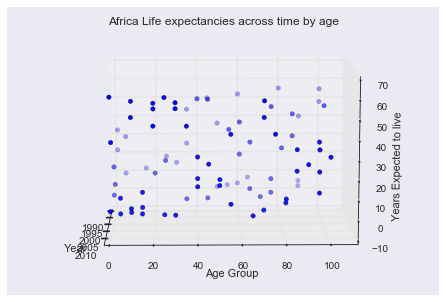

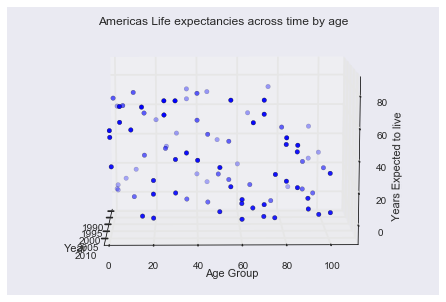

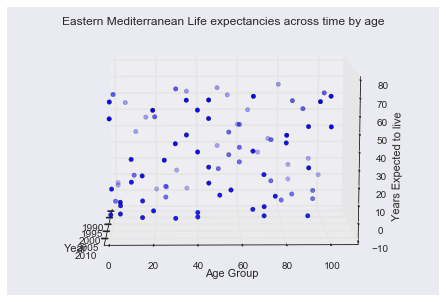

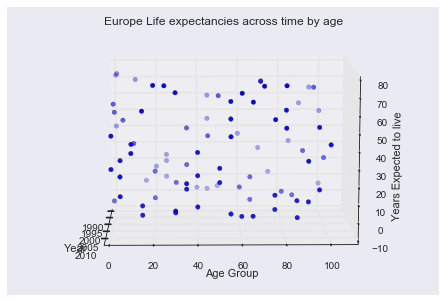

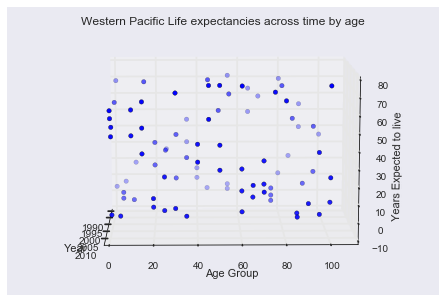

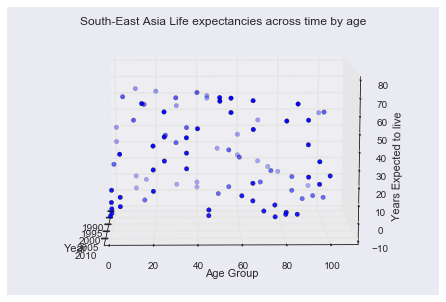

In [10]:
graphExpectancies('Africa',afdf,afAges)
graphExpectancies('Americas', amdf, amAges)
graphExpectancies('Eastern Mediterranean', emdf, emAges)
graphExpectancies('Europe', eudf, euAges)
graphExpectancies('Western Pacific', wpdf,wpAges)
graphExpectancies('South-East Asia', seadf, seaAges)

The graphExpectancies function created 360 snapshots of each graph that we compiled into gifs that can be found in our repo. We realized the 3D representations did address multiple factors which influenced life expectancy and created dynamic visualizations that were interesting from a software engineering standpoint, but the gifs were difficult to interpret and probably not the best at educating the larger public to the inequalities of life expectancy across WHO regions.

We decided to go back to two dimensions to look more clearly at GHO category 35.

In [11]:
def regionYearSeparate(region,cat,age):
    #select category values
    lifeExpec=result[result.GHO==cat]
    #filter for region
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    # only looking at both sexes life expectancy
    bSexLE= regionOnly[regionOnly.SEX == 2]
    #filter by age groups 
    agefilt = bSexLE[bSexLE.AGEGROUP== age]
    agefilt.sort_index(by = ["YEAR"], ascending = True, inplace = True)
    return agefilt

In [12]:
#put in year, numeric value 
def scattersPlots(age,title,africadf,americadf,emeddf,eurodf,wpacifdf,seasiadf):
    fig = plt.figure()
    ax1=fig.add_subplot(111)

    ax1.scatter(africadf.YEAR.values,africadf.Numeric.values, c='b', label ='Africa')
    ax1.scatter(americadf.YEAR.values, americadf.Numeric.values, c= 'r', label = 'Americas')
    ax1.scatter(emeddf.YEAR.values, emeddf.Numeric.values, c= 'y', label = 'E Mediterranean')
    ax1.scatter(eurodf.YEAR.values, eurodf.Numeric.values, c= 'c', label = 'Europe')
    ax1.scatter(wpacifdf.YEAR.values, wpacifdf.Numeric.values, c= 'g', label = 'W Pacific')
    ax1.scatter(seasiadf.YEAR.values, seasiadf.Numeric.values, c= 'm', label = 'SE Asia')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


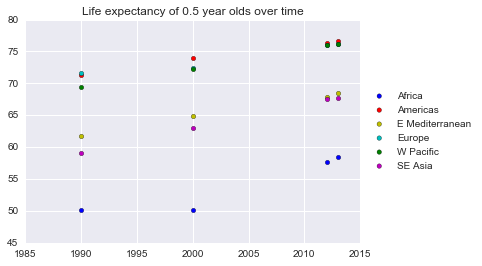

In [13]:
category =35
age =0.5
afdf = regionYearSeparate('AFR',category,age)
amdf = regionYearSeparate('AMR',category,age)
emdf = regionYearSeparate('EMR',category,age) #Eastern Mediterranean
eudf = regionYearSeparate('EUR',category,age) # europe
wpdf = regionYearSeparate('WPR',category,age) #Western Pacific
seadf = regionYearSeparate('SEAR',category,age) #South-East Asia

scattersPlots(age, 'Life expectancy of '+ str(age)+' year olds over time',afdf,amdf,emdf,eudf,wpdf,seadf)

Every life expectancy plot (GHO 35)  demonstrated that life expectancy follows more or less the exact same trend in every region. Life expectancy has been increasing since 1990, and old adults and young infants have the lowest life expectancy. 

Moreover, regions tended to maintain the same ranking with life expectancy; Africa was always the region with the smallest life expectancy, and the Americas always had the greatest. We wanted to engage audiences in a new, educational way so we ultimately decided GHO category 35 was not the best category to continue to examine if we wanted to make an impact. 

We found probability of dying before the next age group (GHO 30) much more interesting because of its variance and plotted in a basic plot over time.  

In [14]:
#put in year, numeric value 
def manyPlots(age,title,africadf,americadf,emeddf,eurodf,wpacifdf,seasiadf):
    fig = plt.figure()
    ax1=fig.add_subplot(111)

    ax1.plot(africadf.YEAR.values,africadf.Numeric.values, c='b', label ='Africa')
    ax1.plot(americadf.YEAR.values, americadf.Numeric.values, c= 'r', label = 'Americas')
    ax1.plot(emeddf.YEAR.values, emeddf.Numeric.values, c= 'y', label = 'E Mediterranean')
    ax1.plot(eurodf.YEAR.values, eurodf.Numeric.values, c= 'c', label = 'Europe')
    ax1.plot(wpacifdf.YEAR.values, wpacifdf.Numeric.values, c= 'g', label = 'W Pacific')
    ax1.plot(seasiadf.YEAR.values, seasiadf.Numeric.values, c= 'm', label = 'SE Asia')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

In [15]:
def multiplots(cate,age, title):
    afdf = regionYearSeparate('AFR',cate,age)
    amdf = regionYearSeparate('AMR',cate,age)#america
    emdf = regionYearSeparate('EMR',cate,age) #Eastern Mediterranean
    eudf = regionYearSeparate('EUR',cate,age) # europe
    wpdf = regionYearSeparate('WPR',cate,age) #Western Pacific
    seadf = regionYearSeparate('SEAR',cate,age) #South-East Asia
    manyPlots(age, title, afdf,amdf,emdf,eudf,wpdf,seadf)

/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


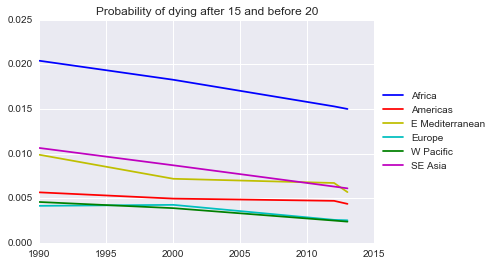

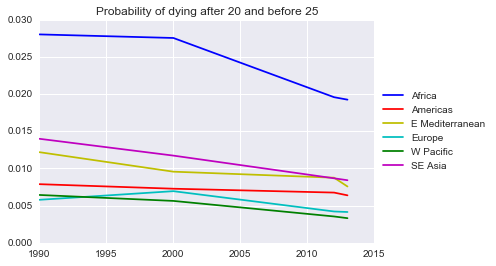

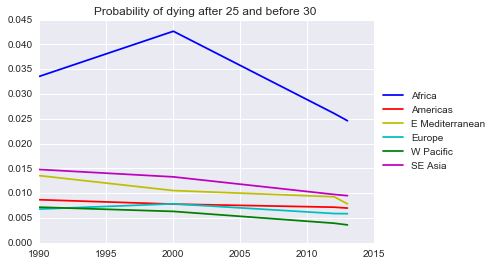

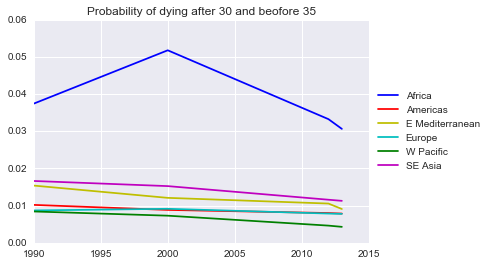

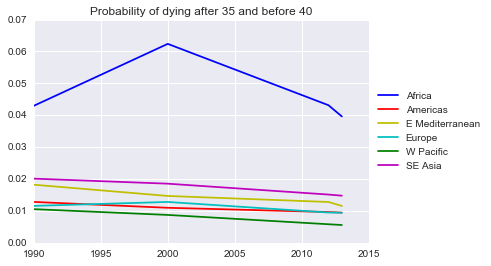

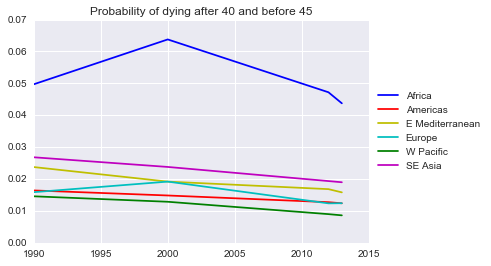

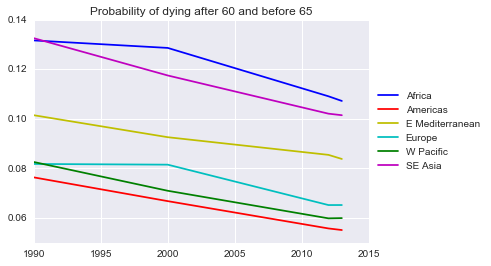

In [16]:
multiplots(30,15,'Probability of dying after 15 and before 20')
multiplots(30,20,'Probability of dying after 20 and before 25')
multiplots(30,25,'Probability of dying after 25 and before 30 ')
multiplots(30,30,'Probability of dying after 30 and beofore 35')
multiplots(30,35,'Probability of dying after 35 and before 40')
multiplots(30,40,'Probability of dying after 40 and before 45')
multiplots(30,60,'Probability of dying after 60 and before 65')

Probabilty of dying varied between years, age groups, and regions pretty frequently. We saw Europe, the Western Pacifc, and the Americas switch off as the region in which one age group was least likely to die. Southeast Asian and the East Mediterranean regions also intermingle as the median probability regions. Africa had a characteristic spike in most adult age groups in the year 2000 that could be traced to an illness or wartime enviornment.

Overall, what we discovered through our explorations was the idea of using different representations of the data can lead to deeper insights, and plotting different information can help point out whether the model is accurate or where next to explore. In total, we feel that by showing statistics in a reasonably easy-to-understand package, any audience can be educated on pain points in populations throughout the world, and begin working to remedy the worst case age groups and regions.